# Used Cars Price Prediction

Importing libraries

In [458]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score

In [459]:
data=pd.read_csv('dataset.csv')
data.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Splitting dataset into train and test set

In [461]:
x=data.iloc[: , :-1]
y=data.iloc[: , -1]

In [462]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [463]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 2484 to 860
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4514 non-null   int64  
 1   Name               4514 non-null   object 
 2   Location           4514 non-null   object 
 3   Year               4514 non-null   int64  
 4   Kilometers_Driven  4514 non-null   int64  
 5   Fuel_Type          4514 non-null   object 
 6   Transmission       4514 non-null   object 
 7   Owner_Type         4514 non-null   object 
 8   Mileage            4513 non-null   object 
 9   Engine             4488 non-null   object 
 10  Power              4488 non-null   object 
 11  Seats              4484 non-null   float64
 12  New_Price          619 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 493.7+ KB


# Data Analysis

As the first column is index, we are removing that index column and considering rest of the columns

In [464]:
x_train=x_train.iloc[:, 1:]
x_test=x_test.iloc[:, 1:]

# Name

Let's see the various cars in dataset

In [465]:
x_train['Name'].value_counts()

Mahindra XUV500 W8 2WD          39
Maruti Swift VDI                33
Hyundai i10 Sportz              26
Maruti Ritz VDi                 26
Maruti Swift Dzire VDI          26
                                ..
BMW X3 xDrive 20d Expedition     1
Ford Fiesta 1.6 ZXi Leather      1
BMW 6 Series 640d Gran Coupe     1
Maruti Ertiga Paseo VDI          1
Hyundai Verna 1.4 CRDi GL        1
Name: Name, Length: 1641, dtype: int64

Let's consider only the manufacturer name and ignore rest of the details

In [466]:
name_train= x_train["Name"].str.split(" ",expand=True)
name_test= x_test["Name"].str.split(" ",expand=True)

In [467]:
x_train['Manufacturer']=name_train[0]
x_test['Manufacturer']=name_test[0]

Let's see the graph for the no of cars

Text(0, 0.5, 'No of cars')

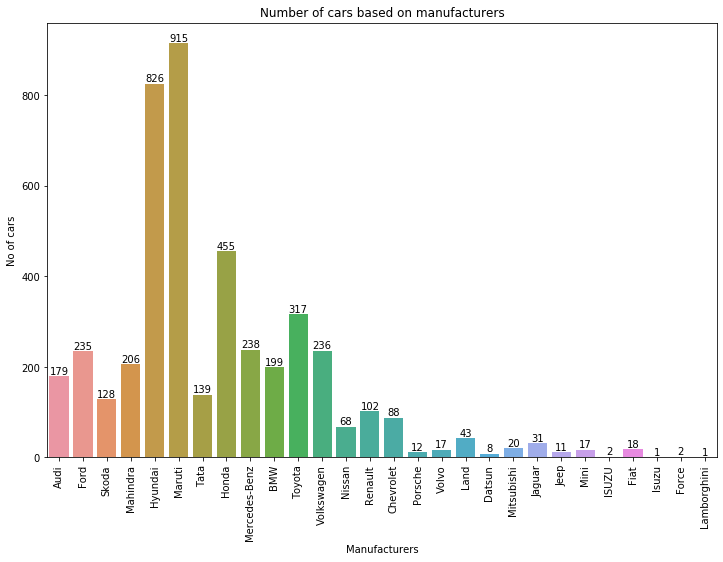

In [468]:
plt.figure(figsize=(12,8))
plot=sns.countplot(x='Manufacturer',data=x_train)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                 (p.get_x()+p.get_width()/2.0,
                  p.get_height()),
                  ha='center',
                  va='center',
                  xytext=(0,5),
                  textcoords='offset points')
plt.title('Number of cars based on manufacturers')
plt.xlabel('Manufacturers')
plt.ylabel('No of cars')

As there are no null values and maximum no of cars by Maruti Manufacturer so we will drop the name column

In [469]:
x_train.drop('Name',axis=1,inplace=True)
x_test.drop('Name',axis=1,inplace=True)

In [470]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 2484 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4514 non-null   object 
 1   Year               4514 non-null   int64  
 2   Kilometers_Driven  4514 non-null   int64  
 3   Fuel_Type          4514 non-null   object 
 4   Transmission       4514 non-null   object 
 5   Owner_Type         4514 non-null   object 
 6   Mileage            4513 non-null   object 
 7   Engine             4488 non-null   object 
 8   Power              4488 non-null   object 
 9   Seats              4484 non-null   float64
 10  New_Price          619 non-null    object 
 11  Manufacturer       4514 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 618.5+ KB


# Location

Location is not useful and shouldn't matter in price prediction so we will drop location too

In [471]:
x_train.drop('Location',axis=1,inplace=True)
x_test.drop('Location',axis=1,inplace=True)

In [472]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 2484 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4514 non-null   int64  
 1   Kilometers_Driven  4514 non-null   int64  
 2   Fuel_Type          4514 non-null   object 
 3   Transmission       4514 non-null   object 
 4   Owner_Type         4514 non-null   object 
 5   Mileage            4513 non-null   object 
 6   Engine             4488 non-null   object 
 7   Power              4488 non-null   object 
 8   Seats              4484 non-null   float64
 9   New_Price          619 non-null    object 
 10  Manufacturer       4514 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 583.2+ KB


# Year

We will try to extract how old the car is so that we can predict the price.

In [473]:
curr_time=datetime.datetime.now()
x_train["Year"]=x_train["Year"].apply(lambda x: curr_time.year - x)
x_test["Year"]=x_test["Year"].apply(lambda x: curr_time.year - x)

# Kilometers driven

The no of kilometers driven is also important aspect in predicting the price.As it is a just a integer, we will directly add it to the train set.

In [476]:
x_train["Kilometers_Driven"]

2484     11000
2024     44555
1436     90000
5443     75378
1222     62729
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4514, dtype: int64

# Fuel type ,Transimission and Owner type

As these are categorical columns,we will get dummies of these columns in preprocessing phase before using those.

# Mileage

In [477]:
mileage_train=x_train['Mileage'].str.split(" ",expand=True)
mileage_test=x_test['Mileage'].str.split(" ",expand=True)

x_train["Mileage"]=pd.to_numeric(mileage_train[0], errors= 'coerce')
x_test["Mileage"]=pd.to_numeric(mileage_test[0], errors= 'coerce')

In [478]:
print(x_train['Mileage'])

2484    17.11
2024    15.20
1436    20.00
5443    18.70
1222    12.05
        ...  
3772    17.97
5191    12.62
5226    15.10
5390    25.80
860     12.80
Name: Mileage, Length: 4514, dtype: float64


Let's check for missing values if any

In [479]:
print(sum(x_train['Mileage'].isnull()))
print(sum(x_test['Mileage'].isnull()))

1
1


There is only one missing value in each so we will replace it with mean value of those columns.

In [480]:
x_train['Mileage'].fillna(x_train['Mileage'].astype('float64').mean(),inplace=True)
x_test['Mileage'].fillna(x_test['Mileage'].astype('float64').mean(),inplace=True)

Let's check

In [481]:
print(sum(x_train['Mileage'].isnull()))
print(sum(x_test['Mileage'].isnull()))

0
0


Yep, Mileage is done

#  Engine and Power

We have to ignore the strings in engine and power columns and convert to integers.

In [482]:
engine_train=x_train['Engine'].str.split(' ',expand=True)
engine_test=x_test['Engine'].str.split(' ',expand=True)
power_train=x_train['Power'].str.split(' ',expand=True)
power_test=x_test['Power'].str.split(' ',expand=True)

x_train['Engine']=pd.to_numeric(engine_train[0],errors='coerce')
x_test['Engine']=pd.to_numeric(engine_test[0],errors='coerce')

x_train['Power']=pd.to_numeric(power_train[0],errors='coerce')
x_test['Power']=pd.to_numeric(power_test[0],errors='coerce')

In [483]:
print(x_train['Engine'])

2484    1968.0
2024    1968.0
1436    1399.0
5443    1896.0
1222    2179.0
         ...  
3772    1498.0
5191    2198.0
5226    2179.0
5390    1498.0
860     2494.0
Name: Engine, Length: 4514, dtype: float64


In [484]:
print(x_train['Power'])

2484    174.33
2024    140.80
1436     68.00
5443     66.00
1222    120.00
         ...  
3772     99.60
5191    158.00
5226    140.00
5390     98.60
860     102.00
Name: Power, Length: 4514, dtype: float64


In [485]:
print(sum(x_train['Engine'].isnull()))
print(sum(x_test['Engine'].isnull()))

print(sum(x_train['Power'].isnull()))
print(sum(x_test['Power'].isnull()))

26
10
100
43


Ohhh!!!!, we have many missing values but no need to worry we have to replace all those missing values with mean.

In [486]:
x_train['Engine'].fillna(x_train['Engine'].astype('float64').mean(),inplace=True)
x_test['Engine'].fillna(x_test['Engine'].astype('float64').mean(),inplace=True)

x_train['Power'].fillna(x_train['Power'].astype('float64').mean(),inplace=True)
x_test['Power'].fillna(x_test['Power'].astype('float64').mean(),inplace=True)

Yes, we have replaced the missing values with means

In [487]:
print(sum(x_train['Engine'].isnull()))
print(sum(x_test['Engine'].isnull()))

print(sum(x_train['Power'].isnull()))
print(sum(x_test['Power'].isnull()))

0
0
0
0


Yep, There are no missing values at all.

# Seats

Seats are already in float values.We will replace the missing values with mean.

In [488]:
x_train['Seats'].fillna(x_train['Seats'].astype('float64').mean(),inplace=True)
x_test['Seats'].fillna(x_test['Seats'].astype('float64').mean(),inplace=True)

In [489]:
print(sum(x_train['Seats'].isnull()))
print(sum(x_test['Seats'].isnull()))

0
0


# New Price

As most of the values are missing in it so we will drop the column.

In [490]:
x_train.drop('New_Price',axis=1,inplace=True)
x_test.drop('New_Price',axis=1,inplace=True)

# Data Processing

Now it's time for preprocessing by creating dummy columns for categorical columns.

In [491]:
x_train=pd.get_dummies(x_train,
                       columns=["Manufacturer", "Fuel_Type", "Transmission","Owner_Type"],
                       drop_first = True)
x_test=pd.get_dummies(x_test,
                      columns=["Manufacturer", "Fuel_Type" , "Transmission" , "Owner_Type"],
                      drop_first = True)

It might be different in creating dummies for train and test set.So if there any missing values, we will fill those.

In [492]:
missing_columns=set(x_train.columns) - set(x_test.columns)
for i in missing_columns:
    x_test[i]=0
x_test = x_test[x_train.columns]

The final step is scaling

In [493]:
standardScaler=StandardScaler()
standardScaler.fit(x_train)
x_train=standardScaler.transform(x_train)
x_test=standardScaler.transform(x_test)

# Training and predicting the price

Let's train the model using Random Forest Regression and predict 

In [495]:
randomReg=RandomForestRegressor(n_estimators=1000,random_state=100)
randomReg.fit(x_train,y_train)
y_pred=randomReg.predict(x_test)
r2_score(y_test,y_pred)

0.8893117111464566

# Hurray! We have got r2_score as 0